### __________________________________________________________________________________________ 


Introduction: Our model focuses on **recall** as a metric to minimize false negatives, ensuring heightened sensitivity in identifying individuals likely to recover from coronavirus symptoms. This strategic choice enhances the model's effectiveness in healthcare decision-making.

### __________________________________________________________________________________________ 


# Data preprocessing

### __________________________________________________________________________________________ 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import RocCurveDisplay

import scikitplot as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, recall_score,roc_curve,f1_score

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
X = df.drop('result' , axis=1)
y = df['result']

In [5]:
X.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0


In [6]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: result, dtype: int64

### Split the data into train data, test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)        

### Normalize the data

In [8]:
scaler = StandardScaler()

In [9]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### __________________________________________________________________________________________ 

# KNN-model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Create KNN - model using CV

In [11]:
k_values = list(range(1, 11))

# Perform cross-validation to find the best k
error_rates = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=10)
    recall = recall_score(y_train, y_pred)
    error_rate = 1 - recall
    error_rates.append(error_rate)

# Find the best k value with the minimum error rate
best_k = k_values[np.argmin(error_rates)]
print(f"The best k value is: {best_k}")

The best k value is: 1


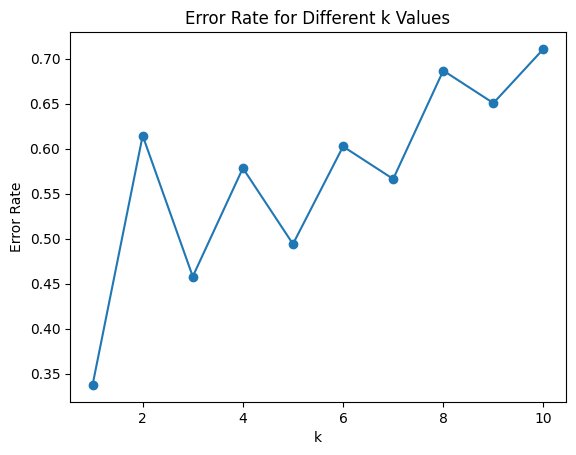

In [12]:
plt.plot(k_values, error_rates, marker='o')
plt.title('Error Rate for Different k Values')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

### Create the final model 

In [13]:
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [14]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predict results for test data 

In [15]:
y_pred_Knn = knn_model.predict(X_test)
y_pred_prob_Knn = knn_model.predict_proba(X_test)
#y_pred_prob_Knn

In [16]:
y_pred_Knn

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

### Apply metrics to measure performance 

In [17]:
confusion_matrix(y_test,y_pred_Knn)

array([[143,   5],
       [ 13,  12]], dtype=int64)

In [18]:
print(classification_report(y_test,y_pred_Knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       148
           1       0.71      0.48      0.57        25

    accuracy                           0.90       173
   macro avg       0.81      0.72      0.76       173
weighted avg       0.89      0.90      0.89       173



### Plot metrics results 

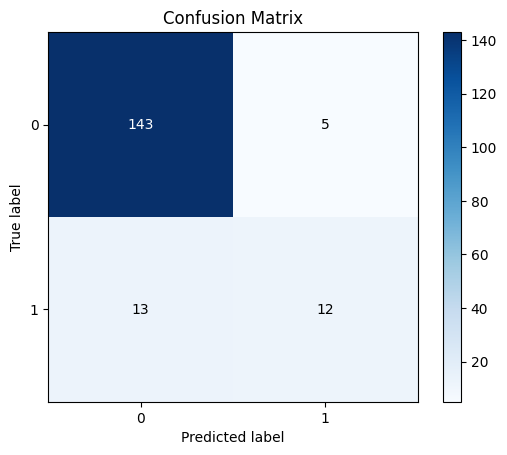

In [19]:
CM_KNN= skplt.metrics.plot_confusion_matrix(y_test, y_pred_Knn)

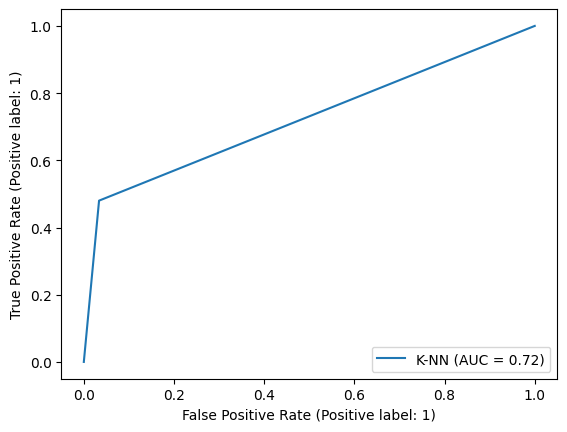

In [20]:
ROC_KNN = RocCurveDisplay.from_predictions(y_test, y_pred_prob_Knn[:, 1],  name='K-NN')

### __________________________________________________________________________________________ 

# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

### Create LogReg model using CV

In [22]:
log_model = LogisticRegression()
cv_scores = cross_val_score(log_model, scaled_X_train, y_train, cv=10, scoring='recall')
cv_scores

array([0.625     , 0.75      , 0.625     , 0.375     , 0.75      ,
       0.625     , 0.5       , 0.77777778, 1.        , 0.88888889])

### Fit the model 

In [23]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [24]:
log_model.coef_

array([[ 0.96792957,  1.05215857, -1.3072453 ,  0.72980649,  3.56466271,
        -0.52955643,  0.65220517, -0.19777342,  0.21600395, -0.22527394,
        -0.20029909,  0.01700654,  0.        ,  0.62130442]])

### Predict results for test data 

In [25]:
y_pred_LR = log_model.predict(scaled_X_test)
y_pred_prob_LR = log_model.predict_proba(scaled_X_test)

### Apply metrics to measure performance 

In [26]:
accuracy_score(y_test,y_pred_LR)

0.9421965317919075

In [27]:
confusion_matrix(y_test,y_pred_LR)

array([[144,   4],
       [  6,  19]], dtype=int64)

In [28]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       148
           1       0.83      0.76      0.79        25

    accuracy                           0.94       173
   macro avg       0.89      0.87      0.88       173
weighted avg       0.94      0.94      0.94       173



### Plot metrics results 

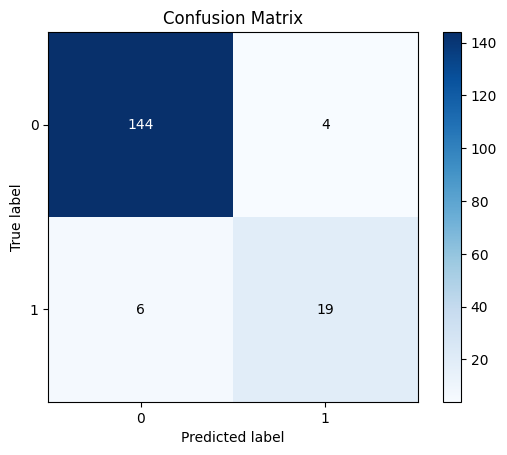

In [29]:
CM_LR = skplt.metrics.plot_confusion_matrix(y_test, y_pred_LR)

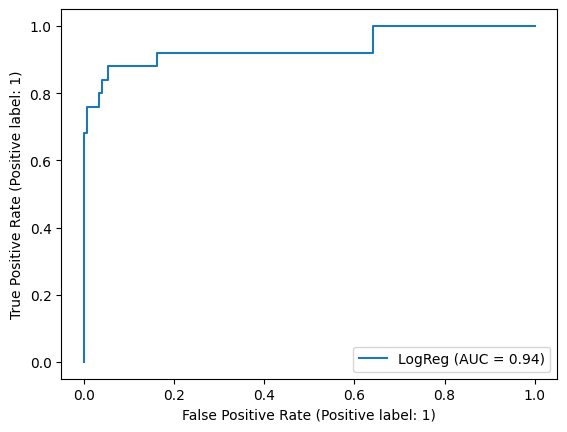

In [30]:
ROC_LR = RocCurveDisplay.from_predictions(y_test, y_pred_prob_LR [:, 1] ,  name='LogReg')

### __________________________________________________________________________________________  

# Naïve Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

### Create Naïve Bayes model

In [32]:
nb_model = GaussianNB()

### Fit the model 

In [33]:
nb_model.fit(scaled_X_train, y_train)

GaussianNB()

In [34]:
y_pred_NB = nb_model.predict(scaled_X_test)
y_pred_prob_NB = nb_model.predict_proba(scaled_X_test)

### Apply metrics to measure performance 

In [35]:
recall_score(y_test,y_pred_NB)

1.0

In [36]:
confusion_matrix(y_test,y_pred_NB)

array([[ 33, 115],
       [  0,  25]], dtype=int64)

In [37]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.22      0.36       148
           1       0.18      1.00      0.30        25

    accuracy                           0.34       173
   macro avg       0.59      0.61      0.33       173
weighted avg       0.88      0.34      0.36       173



### Plot metrics results 

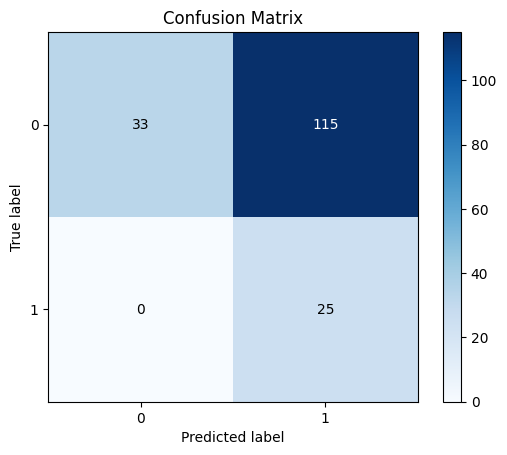

In [38]:
CM_NB = skplt.metrics.plot_confusion_matrix(y_test, y_pred_NB)

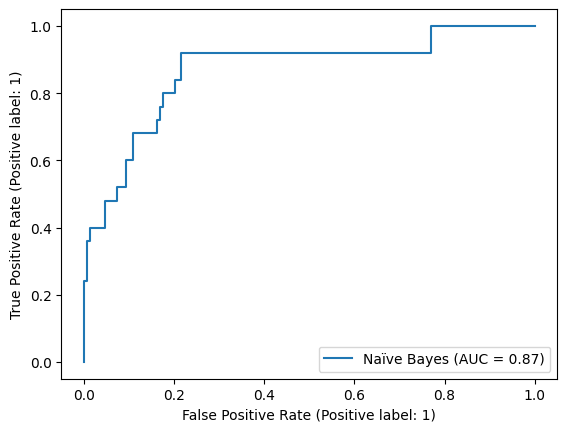

In [39]:
ROC_NB = RocCurveDisplay.from_predictions(y_test, y_pred_prob_NB [:, 1], name='Naïve Bayes')

### __________________________________________________________________________________________  

# Comparing

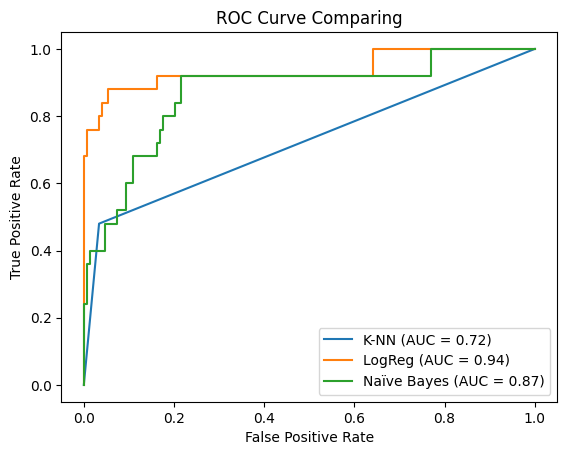

In [40]:
ROC_KNN.plot(ax=plt.gca())
ROC_LR.plot(ax=plt.gca())
ROC_NB.plot(ax=plt.gca())

plt.title('ROC Curve Comparing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

### __________________________________________________________________________________________ 


 Model Performance Summary:

 Among **K-Nearest Neighbors (KNN)**, **Logistic Regression (LogReg)**, and **Naive Bayes**, **LogReg** exhibited the highest 
 **AUC** in the **ROC curve**. This signifies superior discrimination capability, making LogReg a strong contender for 
 further consideration or deployment.

### __________________________________________________________________________________________ 

## SVM model

### Create SVM model

In [41]:
svm_model = SVC(kernel='linear', C=1.0, probability=True)

### Fit the model 

In [42]:
svm_model.fit(scaled_X_train, y_train)

SVC(kernel='linear', probability=True)

In [43]:
y_pred_SVM = svm_model.predict(scaled_X_test)
y_pred_prob_SVM =svm_model.predict_proba(scaled_X_test)

### Apply metrics to measure performance 

In [44]:
recall_score(y_test,y_pred_SVM)

0.8

In [45]:
confusion_matrix(y_test,y_pred_SVM)

array([[144,   4],
       [  5,  20]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       148
           1       0.83      0.80      0.82        25

    accuracy                           0.95       173
   macro avg       0.90      0.89      0.89       173
weighted avg       0.95      0.95      0.95       173



### Plot metrics results 

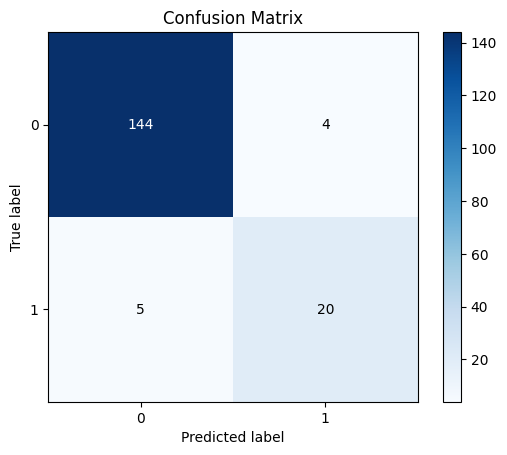

In [47]:
CM_SVM = skplt.metrics.plot_confusion_matrix(y_test, y_pred_SVM)

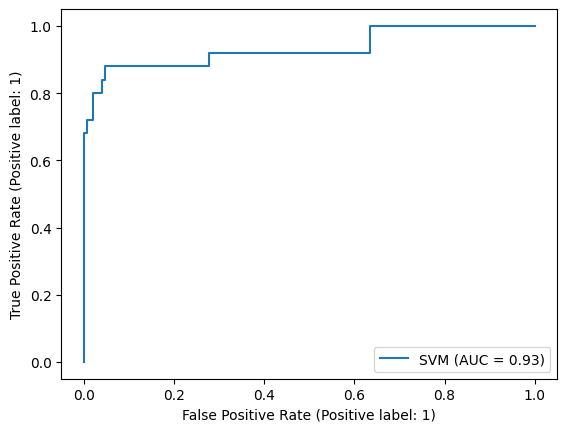

In [48]:
ROC_SVM = RocCurveDisplay.from_predictions(y_test, y_pred_prob_SVM [:, 1], name='SVM')

### __________________________________________________________________________________________ 

# Decision Tree

#### Use gridSearch cross validation to get best hyperparameters[max_depth, min_samples_split, min_samples_leaf] for decision tree model

### Create GridSearch Parameters

In [49]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

### Create Decision Tree model

In [50]:
dt_model = DecisionTreeClassifier(random_state=42)

### Create GridSearch CV to find best hyperparameters

In [51]:
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='recall')
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall')

In [52]:
best_params = grid_search.best_params_

### Fit the model 

In [53]:
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(scaled_X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [54]:
y_pred_dt = best_dt_model.predict(scaled_X_test)
y_pred_prob_dt =best_dt_model.predict_proba(scaled_X_test)

### Apply metrics to measure performance 

In [55]:
recall_score(y_test,y_pred_dt)

0.88

In [56]:
confusion_matrix(y_test,y_pred_dt)

array([[144,   4],
       [  3,  22]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       148
           1       0.85      0.88      0.86        25

    accuracy                           0.96       173
   macro avg       0.91      0.93      0.92       173
weighted avg       0.96      0.96      0.96       173



### Plot metrics results 

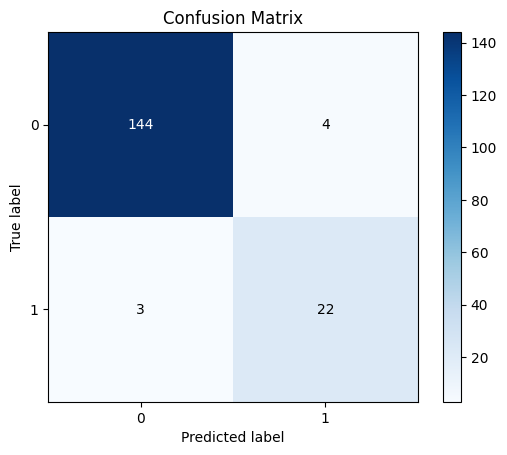

In [58]:
CM_dt = skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt)

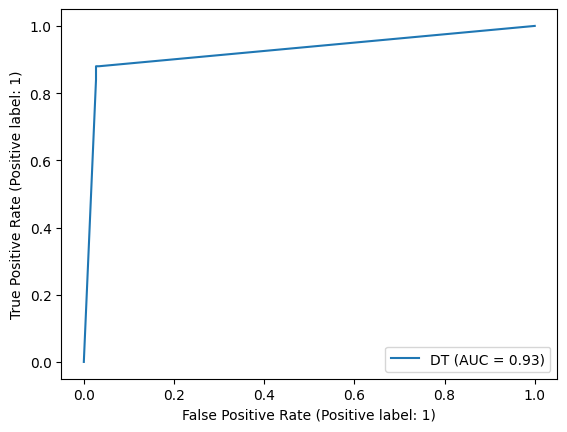

In [59]:
ROC_dt = RocCurveDisplay.from_predictions(y_test, y_pred_prob_dt [:, 1], name='DT')

### __________________________________________________________________________________________ 

# Comparing

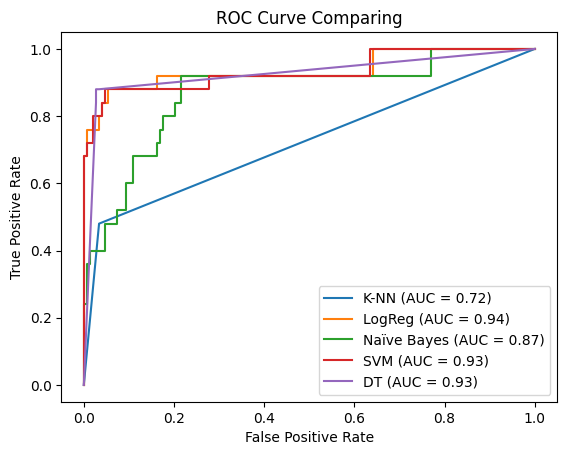

In [60]:
ROC_KNN.plot(ax=plt.gca())
ROC_LR.plot(ax=plt.gca())
ROC_NB.plot(ax=plt.gca())
ROC_SVM.plot(ax=plt.gca())
ROC_dt.plot(ax=plt.gca())

plt.title('ROC Curve Comparing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

### __________________________________________________________________________________________ 

Model Performance Summary:
Among K-Nearest Neighbors (KNN), Logistic Regression (LogReg), Naive Bayes, SVM and Decision tree. LogReg exhibited the highest AUC in the ROC curve. This signifies superior discrimination capability, making LogReg a strong contender for further consideration or deployment.

### __________________________________________________________________________________________ 